# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('sport.csv')

In [3]:
df.head()

,date,away_team,away_pitcher,away_score,home_score,home_win,home_team,home_pitcher,away_pitcher_games,home_pitcher_games,closing_total,away_ml_percent,home_ml_odds_percent
0,3/28/19,Los Angeles Angels,T CAHILL,0,4,W,Oakland Athletics,M FIERS,9,15,8.5,51.7,50.0
1,3/28/19,Pittsburgh Pirates,J TAILLON,3,5,W,Cincinnati Reds,L CASTILLO,5,19,8.5,49.3,52.4
2,3/28/19,Chicago White Sox,C RODON,3,5,W,Kansas City Royals,B KELLER,6,10,8.5,47.4,54.3
3,3/28/19,Arizona Diamondbacks,Z GREINKE,5,12,W,Los Angeles Dodgers,H RYU,33,13,7.0,39.4,62.3
4,3/28/19,Colorado Rockies,K FREELAND,6,3,L,Miami Marlins,J URENA,21,6,7.5,56.0,45.7


# Checking Missing Values

In [4]:
df.isna().sum()

date                    0
away_team               0
away_pitcher            0
away_score              0
home_score              0
home_win                0
home_team               0
home_pitcher            0
away_pitcher_games      0
home_pitcher_games      0
closing_total           0
away_ml_percent         0
home_ml_odds_percent    0
dtype: int64

# Checking Shape

In [5]:
df.shape

(2425, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 13 columns):
date                    2425 non-null object
away_team               2425 non-null object
away_pitcher            2425 non-null object
away_score              2425 non-null int64
home_score              2425 non-null int64
home_win                2425 non-null object
home_team               2425 non-null object
home_pitcher            2425 non-null object
away_pitcher_games      2425 non-null int64
home_pitcher_games      2425 non-null int64
closing_total           2425 non-null float64
away_ml_percent         2425 non-null float64
home_ml_odds_percent    2425 non-null float64
dtypes: float64(3), int64(4), object(6)
memory usage: 246.4+ KB


# Dealing with Date Attribute

In [7]:
df['date']= pd.to_datetime(df['date'])

In [8]:
df['month'] = df['date'].dt.month

In [9]:
df[['date','month']].head()

,date,month
0,2019-03-28,3
1,2019-03-28,3
2,2019-03-28,3
3,2019-03-28,3
4,2019-03-28,3


In [10]:
df['day'] = df['date'].dt.day


In [11]:
df['year'] = df['date'].dt.year

In [12]:
df.head()

,date,away_team,away_pitcher,away_score,home_score,home_win,home_team,home_pitcher,away_pitcher_games,home_pitcher_games,closing_total,away_ml_percent,home_ml_odds_percent,month,day,year
0,2019-03-28,Los Angeles Angels,T CAHILL,0,4,W,Oakland Athletics,M FIERS,9,15,8.5,51.7,50.0,3,28,2019
1,2019-03-28,Pittsburgh Pirates,J TAILLON,3,5,W,Cincinnati Reds,L CASTILLO,5,19,8.5,49.3,52.4,3,28,2019
2,2019-03-28,Chicago White Sox,C RODON,3,5,W,Kansas City Royals,B KELLER,6,10,8.5,47.4,54.3,3,28,2019
3,2019-03-28,Arizona Diamondbacks,Z GREINKE,5,12,W,Los Angeles Dodgers,H RYU,33,13,7.0,39.4,62.3,3,28,2019
4,2019-03-28,Colorado Rockies,K FREELAND,6,3,L,Miami Marlins,J URENA,21,6,7.5,56.0,45.7,3,28,2019


# Statistical Overview of Dataset

In [13]:
df.describe()

,away_score,home_score,away_pitcher_games,home_pitcher_games,closing_total,away_ml_percent,home_ml_odds_percent,month,day,year
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.0
mean,4.816907,4.825979,11.170722,5.341443,9.114227,47.334186,54.366103,6.450722,16.060206,2019.0
std,3.409044,3.220741,8.684926,4.416408,1.216186,11.047962,11.048058,1.779323,8.916860,0.0
min,0.000000,0.000000,0.000000,0.000000,6.000000,17.800000,19.800000,3.000000,1.000000,2019.0
25%,2.000000,2.000000,4.000000,2.000000,8.500000,39.600000,46.500000,5.000000,8.000000,2019.0
50%,4.000000,4.000000,10.000000,4.000000,9.000000,46.700000,55.000000,6.000000,16.000000,2019.0
75%,7.000000,7.000000,18.000000,8.000000,9.500000,55.200000,62.100000,8.000000,24.000000,2019.0
max,23.000000,21.000000,34.000000,19.000000,15.000000,81.900000,83.900000,10.000000,31.000000,2019.0


In [14]:
df.describe(include=["O"])

,away_team,away_pitcher,home_win,home_team,home_pitcher
count,2425,2425,2425,2425,2425
unique,30,327,2,30,325
top,Tampa Bay Rays,S STRASBURG,W,Washington Nationals,L CASTILLO
freq,84,20,1288,84,20


# Removing unnecessary attribute

In [15]:
df=df.drop(['date'], axis=1)

# Train and Test Data

In [16]:
X=df.drop(['home_win'], axis=1)

In [17]:
#ONEHOT ENCODING BLOCK
X = pd.get_dummies(X, columns=['away_team', 'home_team', 'away_pitcher','home_pitcher'])


# Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['home_win'].values)
y


array([1, 1, 1, ..., 1, 0, 1])

# Train Test Split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1697, 722)
(728, 722)
(1697,)
(728,)


# Linear Model(Machine Learning Algorithm)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

-44750100690324.92
[-8.65124566e-02  8.52046259e-02  2.01892996e-03  6.80148407e-03
 -1.28166278e-03  2.15836831e-01  2.12201651e-01  1.00846771e-02
 -5.39706149e-04  2.21652304e+10  3.68408845e+09  1.14197553e+09
  1.14197553e+09  1.14197553e+09  1.35053520e+09  3.18445291e+09
  1.14197553e+09  1.14197553e+09  1.14197553e+09  3.68408845e+09
  3.68408845e+09  1.14197553e+09  1.14197553e+09  5.17534396e+09
  3.68408845e+09  1.35053520e+09 -2.64855934e+09  3.68408845e+09
  2.45197679e+07  1.14197553e+09  3.68408845e+09  1.35053520e+09
  3.58644441e+09  1.35053520e+09  3.68408845e+09 -1.39225098e+09
  3.68408845e+09  3.68408845e+09  3.68408845e+09  4.25968008e+09
 -3.50081686e+09 -1.68795759e+08 -4.21356574e+09 -4.21356573e+09
 -2.86020559e+09 -2.99675637e+09 -4.21356574e+09 -4.21356574e+09
 -4.21356574e+09 -3.50081686e+09 -3.50081686e+09 -4.21356574e+09
 -4.44796718e+09 -6.20493568e+07 -3.50081686e+09 -4.21356573e+09
 -2.22947266e+09 -3.50081686e+09 -4.92124288e+09 -4.21356574e+09
 -3.50

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 60110256.34250515
Mean Squared Error: 1.1583766338426205e+17
Root Mean Squared Error: 340349325.5234422


# Random forest Mode(ML)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=200)

model.fit(X_train,y_train)

predictions=model.predict(X_test)

In [26]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9629120879120879


In [27]:
confus_matrix=confusion_matrix(y_test,predictions)
print(confus_matrix)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[325  20]
 [  7 376]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       345
           1       0.95      0.98      0.97       383

    accuracy                           0.96       728
   macro avg       0.96      0.96      0.96       728
weighted avg       0.96      0.96      0.96       728

0.9629120879120879


Test Data Accuracy: 0.9629


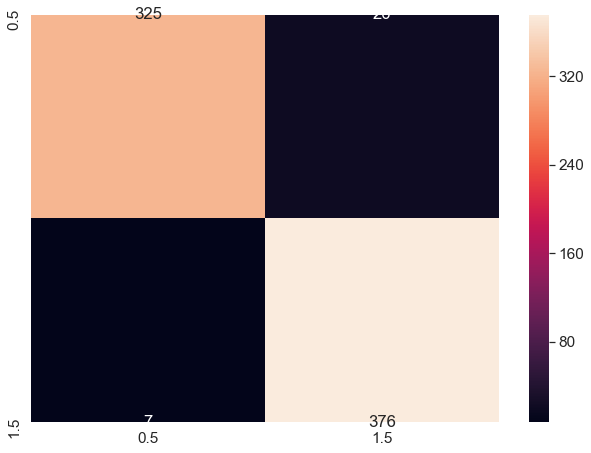

In [28]:
confus_matrix = confusion_matrix(y_test, predictions)
datafram_confus_matrix = pd.DataFrame(confus_matrix, index = (0.5, 1.5), columns = (0.5, 1.5))
plt.figure(figsize = (10.5,7.5))
sns.set(font_scale=1.4)
sns.heatmap(datafram_confus_matrix, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, predictions))